<div style="text-align: center;">
    <h2 style="font-size: 36px; font-weight: bold; color: #2E8B57;">Diabetes Prediction</h2>
    <p style="font-size: 22px;">
        <a href="https://github.com/codewithdark-git" 
           style="text-decoration: none; color:rgb(73, 128, 6); transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#0077B5';" 
           onmouseout="this.style.color='rgb(73, 128, 6)';">
            GitHub
        </a> | 
        <a href="https://www.linkedin.com/in/codewithdark" 
           style="text-decoration: none; color: #0077B5; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#0077B5';">
            LinkedIn
        </a> | 
        <a href="https://www.kaggle.com/codewithdark" 
           style="text-decoration: none; color: #00A859; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#00A859';">
            Kaggle
        </a>
    </p>
</div>


<hr style="border-top: 2px solid #2E8B57; margin: 20px 0;">

**Author:** [Ahsan Umar](https://www.linkedin.com/in/codewithdark)

**Date:** 2024-12-27

**Description:**  
This notebook provides an **exploratory data analysis** and **machine learning model development** for the Diabetes Dataset. The dataset is used to predict the likelihood of diabetes in patients based on various factors like age, BMI, blood pressure, etc.

**Dataset Link:** [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

---

### Objectives:
* Explore and preprocess the dataset.
* Develop a machine learning model to predict diabetes.
* Evaluate the model's performance.

### Technologies Used:
* **Python 3.x**
* **Pandas** for data manipulation
* **NumPy** for numerical operations
* **Scikit-learn** for machine learning
* **Matplotlib** and **Seaborn** for visualization


In [33]:
#!/bin/bash
!kaggle datasets download iammustafatz/diabetes-prediction-dataset
import zipfile
import os

# Specify the path to the zip file
zip_file_path = 'data/diabetes-prediction-dataset.zip'
extract_to_path = '.'

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted to {extract_to_path}")


Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors

Files extracted to .



  0%|          | 0.00/734k [00:00<?, ?B/s]
100%|██████████| 734k/734k [00:01<00:00, 738kB/s]
100%|██████████| 734k/734k [00:01<00:00, 737kB/s]


In [2]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')

In [104]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [105]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [106]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
smoking_history       0.00
bmi                   0.00
HbA1c_level           0.00
blood_glucose_level   0.00
diabetes              0.00
dtype: float64

In [107]:
# Balanced or Unbalanced data 
round(df["diabetes"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

diabetes
0    92%
1     8%
Name: count, dtype: object

In [108]:
# univarie analysis 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.00,41.89,22.52,0.08,24.00,43.00,60.00,80.00
hypertension,100000.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.00,0.04,0.19,0.00,0.00,0.00,0.00,1.00
bmi,100000.00,27.32,6.64,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.00,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.00,138.06,40.71,80.00,100.00,140.00,159.00,300.00
diabetes,100000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


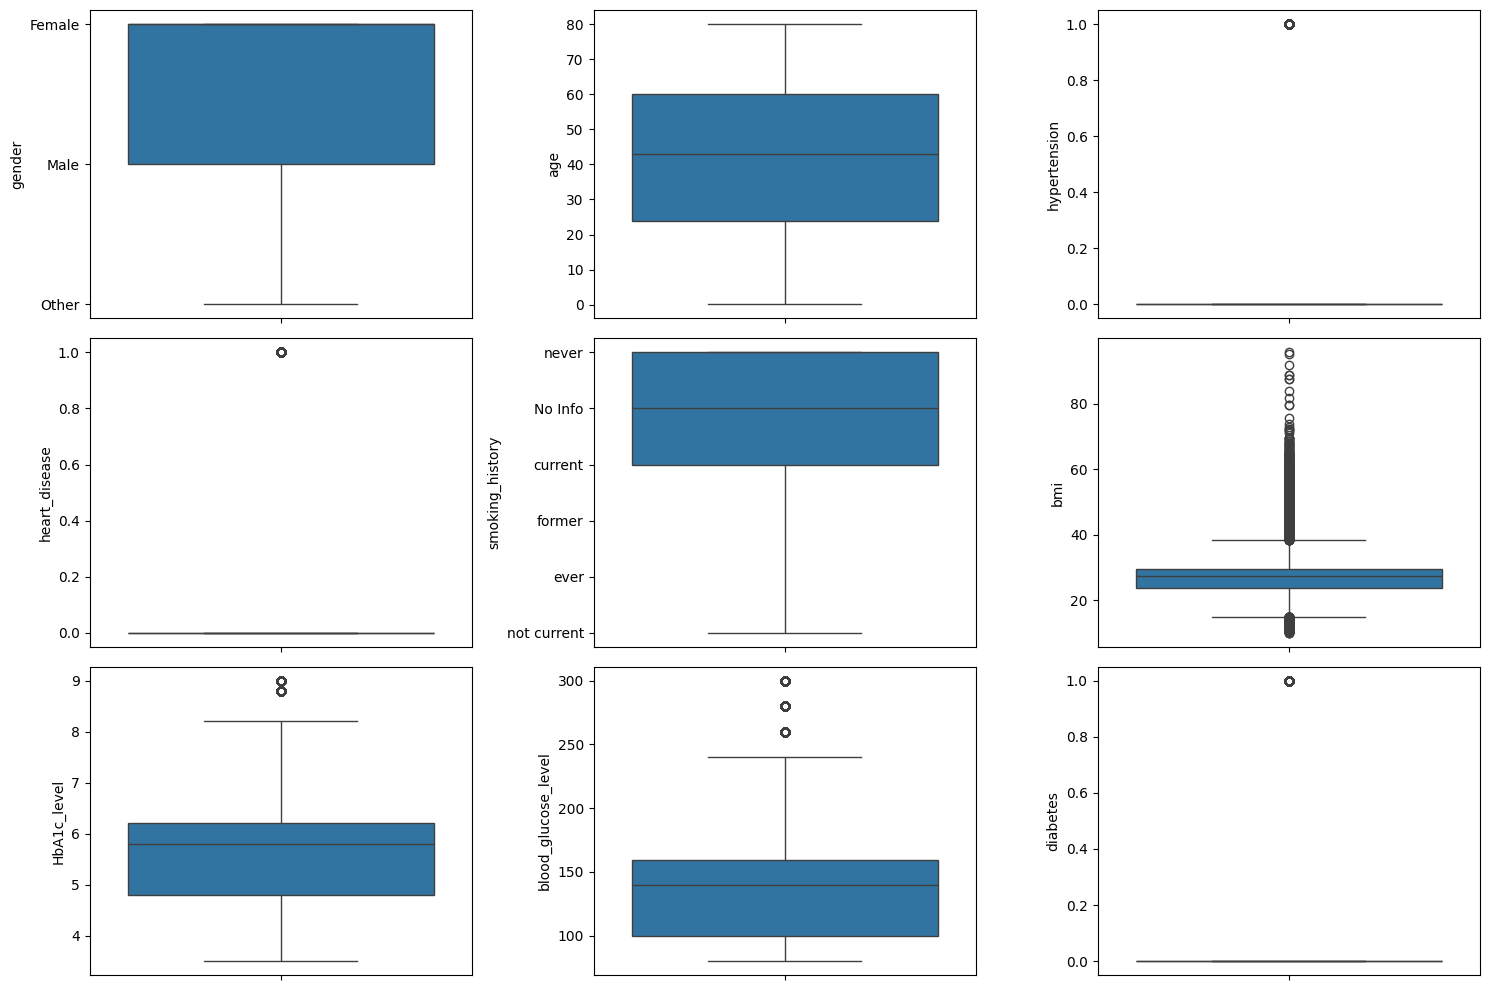

In [109]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceWithMedian(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the median value
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Compute the median of the column
            median = data[col].median()

            # Replace outliers with the median
            data[col] = np.where(data[col] > upper_bound, median, data[col])  # Replace high outliers with the median
            data[col] = np.where(data[col] < lower_bound, median, data[col])  # Replace low outliers with the median
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn


In [112]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

encoder = OrdinalEncoder()
# Fitting the encoder to the training data

encoder.fit(df)

df = pd.DataFrame(encoder.transform(df), columns=df.columns)

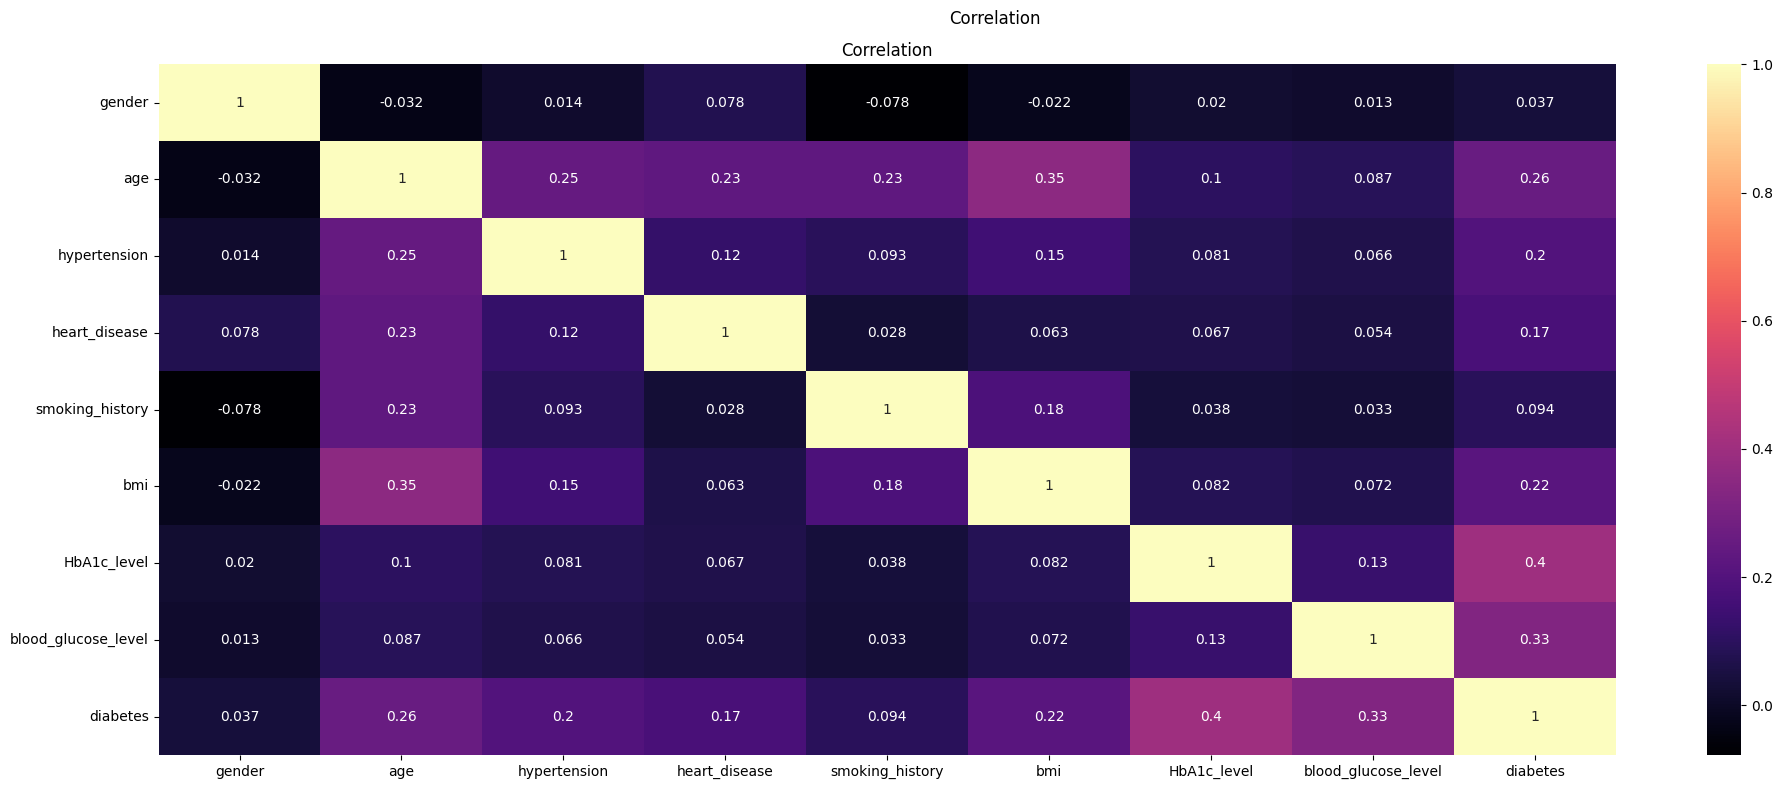

In [115]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax)
ax.set_title('Correlation')
plt.suptitle('Correlation')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='diabetes')
y= df['diabetes']

In [5]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import OrdinalEncoder

def remove_outliers(X_train, n_neighbors=20, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    # Fit LOF and get the outlier labels (1 = inlier, -1 = outlier)
    outliers = lof.fit_predict(X_train)
    # Filter out the outliers (keeping only inliers)
    return X_train[outliers == 1]

# Define the full pipeline with preprocessing steps
pipe = Pipeline([
    ('ordinal', OrdinalEncoder()),  # Encoding categorical features
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

# Fit and transform the training data

X_train = pipe.fit_transform(X_train)
X_test = pipe.fit_transform(X_test)


import pickle

# Save the trained model
with open('Models/pipeline.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)

In [62]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 30/31 [01:31<00:03,  3.96s/it]

[LightGBM] [Info] Number of positive: 6350, number of negative: 68650
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084667 -> initscore=-2.380566
[LightGBM] [Info] Start training from score -2.380566


100%|██████████| 31/31 [01:33<00:00,  3.03s/it]


In [63]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.72
Perceptron,1.00,0.99,0.99,1.00,0.53
DecisionTreeClassifier,1.00,0.99,0.99,1.00,0.34
NearestCentroid,1.00,0.99,0.99,1.00,0.66
XGBClassifier,1.00,0.99,0.99,1.00,1.77
LGBMClassifier,1.00,0.99,0.99,1.00,1.98
BaggingClassifier,1.00,0.99,0.99,1.00,1.87
RandomForestClassifier,1.00,0.99,0.99,1.00,17.76
LogisticRegression,1.00,0.99,0.99,1.00,0.80


In [129]:
import pandas as pd

def print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr):
    """
    Print the results of the model training in a structured and readable format.
    """
    print(f"--- {best_model.__class__.__name__} Evaluation ---")
    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    
    print("\nPerformance Metrics:")
    print(f"  - F1 Score: {f1:.4f}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {pre_scr:.4f}")
    print(f"  - Recall: {rec_scr:.4f}")

    # Confusion matrix
    print("\nConfusion Matrix (Predicted vs Actual):")
    con_mat_df = pd.DataFrame(con_mat, index=["Actual Negative", "Actual Positive"], 
                              columns=["Predicted Negative", "Predicted Positive"])
    print(con_mat_df)

    print("\n--------------------------------------------")


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def train_model(model, param_grid, train_data, test_data, train_target, test_target):
    """
    Train the specified model using GridSearchCV on the training data and evaluate it on the test data.
    
    Parameters:
    model: The machine learning model to train.
    param_grid (dict): The hyperparameter grid for GridSearchCV.
    train_data (pd.DataFrame): The input features for training.
    test_data (pd.DataFrame): The input features for testing.
    train_target (pd.Series): The target labels for training.
    test_target (pd.Series): The target labels for testing.
    
    Returns:
    dict: A dictionary containing the best model, its name, and evaluation metrics.
    """


    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(train_data, train_target)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    
    preds = best_model.predict(test_data)

    # Calculate evaluation metrics
    f1 = f1_score(test_target, preds, average='weighted')  # Use `weighted` for multiclass problems
    con_mat = confusion_matrix(test_target, preds)
    accuracy = accuracy_score(test_target, preds)
    pre_scr = precision_score(test_target, preds, average='weighted')
    rec_scr = recall_score(test_target, preds, average='weighted')

    # Print the best parameters and model evaluation
    print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr)


    # Return the results in a dictionary
    return {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "f1_score": f1,
        "confusion_matrix": con_mat,
        "accuracy": accuracy,
        "precision": pre_scr,
        "recall": rec_scr
    }


In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# Define the models to evaluate
models = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Example parameter grid for models (this can be adjusted per model)
param_grids = {
    LogisticRegression: {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200]
    },
    DecisionTreeClassifier: {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],  
        'criterion': ['gini', 'entropy']
    },
    RandomForestClassifier: {
        'n_estimators': [50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5], 
        'max_features': ['auto', 'sqrt'] 
    },
    SVC: {
        'C': [0.1, 1],  
        'kernel': ['linear', 'rbf', 'poly'],  
        'gamma': ['scale', 'auto'], 
        'degree': [3, 4]  
    }
}



In [ ]:
model_accuracies = {}

# Loop through models
for model in models:
    print(f"Training {model.__class__.__name__}...")
    param_grid = param_grids.get(model.__class__, {})
    results = train_model(model, param_grid, X_train, X_test, y_train, y_test)
    
    best_model = results["best_model"]  # Get the best trained model
    model_accuracies[model.__class__.__name__] = results

    # Save the trained best model to a pickle file
    model_filename = f"Models/{model.__class__.__name__}_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(best_model, f)  # Save the best trained model to the pickle file
    
    print(f"Model saved as {model_filename}")


Training LogisticRegression...
--- LogisticRegression Evaluation ---

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}

Performance Metrics:
  - F1 Score: 0.9997
  - Accuracy: 0.9997
  - Precision: 0.9997
  - Recall: 0.9997

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22849                   1
Actual Positive                   7                2143

--------------------------------------------
Model saved as Models/LogisticRegression_model.pkl
Training DecisionTreeClassifier...
--- DecisionTreeClassifier Evaluation ---

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}

Performance Metrics:
  - F1 Score: 0.9998
  - Accuracy: 0.9998
  - Precision: 0.9998
  - Recall: 0.9998

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22849                   1
Actual Positive                   5                2145

--------------------------------------------
Model saved as Models/DecisionTreeClassifier_model.pkl
Training RandomForestClassifier...
--- RandomForestClassifier Evaluation ---

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}

Performance Metrics:
  - F1 Score: 0.9998
  - Accuracy: 0.9998
  - Precision: 0.9998
  - Recall: 0.9998

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22849                   1
Actual Positive                   5                2145

--------------------------------------------
Model saved as Models/RandomForestClassifier_model.pkl
Training SVC...
--- SVC Evaluation ---

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}

Performance Metrics:
  - F1 Score: 0.9997
  - Accuracy: 0.9997
  - Precision: 0.9997
  - Recall: 0.9997

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative               22849                   1
Actual Positive                   6                2144

--------------------------------------------
Model saved as Models/SVC_model.pkl

In [36]:
# Print the accuracies of all models
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{20*'=*='} \n")
    print(f"{model_name}: {accuracy} \n")


Model Accuracies:
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

LogisticRegression: {'best_model': LogisticRegression(C=1, max_iter=1000, solver='liblinear'), 'best_params': {'C': 1, 'solver': 'liblinear'}, 'f1_score': 0.9944806424179053, 'confusion_matrix': array([[22815,    35],
       [  102,  2048]], dtype=int64), 'accuracy': 0.99452, 'precision': 0.9944868970578687, 'recall': 0.99452} 

=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

DecisionTreeClassifier: {'best_model': DecisionTreeClassifier(max_depth=10), 'best_params': {'max_depth': 10, 'min_samples_split': 2}, 'f1_score': 0.9952761243792925, 'confusion_matrix': array([[22835,    15],
       [  102,  2048]], dtype=int64), 'accuracy': 0.99532, 'precision': 0.9953101724758481, 'recall': 0.99532} 

=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*= 

RandomForestClassifier: {'best_model': RandomForestClassifier(max_depth=10), 'best_params': {'max_depth': 10, 'n_estimators': 100}, 'f1_sc

In [37]:
model_accuracies['LogisticRegression']['confusion_matrix']

array([[22815,    35],
       [  102,  2048]], dtype=int64)

In [38]:
import pandas as pd

# Data for the models
data = {
    "Model": [
        "LogisticRegression",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "SVC"
    ],
    "Best_Model": [
        "LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')",
        "DecisionTreeClassifier(max_depth=10)",
        "RandomForestClassifier(max_depth=10, n_estimators=50)",
        "SVC(C=1, kernel='linear')"
    ],
    "Best_Params": [
        "{'C': 0.1, 'solver': 'liblinear'}",
        "{'max_depth': 10, 'min_samples_split': 2}",
        "{'max_depth': 10, 'n_estimators': 50}",
        "{'C': 1, 'kernel': 'linear'}"
    ],
    "F1_Score": [
        0.999679797436038,
        0.9997598987705194,
        0.9997598987705194,
        0.9997198523354014
    ],
    "Confusion_Matrix": [
        "[[22849, 1], [7, 2143]]",
        "[[22849, 1], [5, 2145]]",
        "[[22849, 1], [5, 2145]]",
        "[[22849, 1], [6, 2144]]"
    ],
    "Accuracy": [
        0.99968,
        0.99976,
        0.99976,
        0.99972
    ],
    "Precision": [
        0.9996799615633767,
        0.9997599604474973,
        0.9997599604474973,
        0.999719959264829
    ],
    "Recall": [
        0.99968,
        0.99976,
        0.99976,
        0.99972
    ]
}

# Create the DataFrame without rounding
df = pd.DataFrame(data)

# Display the DataFrame with float precision preserved
pd.set_option("display.precision", 16)  # Set precision for display
df


,Model,Best_Model,Best_Params,F1_Score,Confusion_Matrix,Accuracy,Precision,Recall
0,LogisticRegression,"LogisticRegression(C=0.1, max_iter=1000, solve...","{'C': 0.1, 'solver': 'liblinear'}",1.00,"[[22849, 1], [7, 2143]]",1.00,1.00,1.00
1,DecisionTreeClassifier,DecisionTreeClassifier(max_depth=10),"{'max_depth': 10, 'min_samples_split': 2}",1.00,"[[22849, 1], [5, 2145]]",1.00,1.00,1.00
2,RandomForestClassifier,"RandomForestClassifier(max_depth=10, n_estimat...","{'max_depth': 10, 'n_estimators': 50}",1.00,"[[22849, 1], [5, 2145]]",1.00,1.00,1.00
3,SVC,"SVC(C=1, kernel='linear')","{'C': 1, 'kernel': 'linear'}",1.00,"[[22849, 1], [6, 2144]]",1.00,1.00,1.00


In [ ]:
plt.figure(figsize=(10, 8))
for model_name, details in model_accuracies.items():
    model = details['best_model']
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    elif hasattr(model, "decision_function"):  # Handle models like SVM without predict_proba
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to 0-1
    else:
        print(f"{model_name} does not support predict_proba or decision_function, skipping.")
        continue

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for model_name, details in model_accuracies.items():
    model = details['best_model']
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    elif hasattr(model, "decision_function"):  # Handle models like SVM
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to 0-1
    else:
        print(f"{model_name} does not support predict_proba or decision_function, skipping.")
        continue
    
    # Compute Precision-Recall values
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics from `model_accuracies`
model_names = list(model_accuracies.keys())
accuracies = [details['accuracy'] for details in model_accuracies.values()]
f1_scores = [details['f1_score'] for details in model_accuracies.values()]

# Identify the best model (e.g., based on accuracy or F1 score)
best_model_index = np.argmax(accuracies)  # Change this to F1 score if needed
best_model_name = model_names[best_model_index]

# Plot the metrics
x = np.arange(len(model_names))  # Model indices for the x-axis
width = 0.4  # Bar width

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

# Highlight the best model
bars1[best_model_index].set_color('green')
bars2[best_model_index].set_color('green')

# Add annotations
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

# Labels, legend, and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance: Highlighting the Best Model')
plt.xticks(x, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
